In [2]:
import os
import numpy as np
import keras
from keras.models import model_from_yaml

model_path = "../models/"
model = model_from_yaml(open(os.path.join(model_path, "model_storedata_15stores_mse_1layer_dropout.yaml")).read())


Using Theano backend.


In [17]:
model.load_weights(os.path.join(model_path, "model_storedata_15stores_mse_1layer_dropout_weights.hd5"))
model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])

In [18]:
import pandas as pd
from pandas import HDFStore

data_dir = "../data/"
hdf = HDFStore(os.path.join(data_dir, "data_15_stores.hd5"))

In [19]:
store_data = hdf['store_data']
stores = store_data['Store'].unique()

input_features = ['DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'WeekOfYear', 'Year']

output_features_openonly = ['SalesNormOpenOnly', 'CustomersNormOpenOnly']
output_features = ['SalesNorm', 'CustomersNorm']

store_features = ['StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionMonthsSinceOpen',
                  'Promo2', 'Promo2WeeksSinceJoined', 'StoreNorm']

train_features_full = ['SalesNorm', 'CustomersNorm', 'Open', 'DayOfWeek',
                       'Promo', 'StateHoliday', 'SchoolHoliday', 'WeekOfYear']
batch_size = 32

In [35]:
train_inputs = hdf['train_data'][input_features]\
                   .loc[hdf['train_data']['Store'] == 1022]\
                   .as_matrix()

store_inputs = hdf['store_data'][store_features]\
                   .loc[hdf['store_data']['Store'] == 1022]\
                   .as_matrix()

train_inputs = np.append(np.repeat(store_inputs, len(train_inputs), axis=0),
                         train_inputs, axis=1)

train_inputs_1022 = train_inputs.reshape(train_inputs.shape + (1,))

train_outputs_1022 = hdf['train_data'][output_features]\
                       .loc[hdf['train_data']['Store'] == 1022]\
                       .as_matrix()
print('\n\nStore: ' + str(1022) + '\n')
#history = model.fit(train_inputs_1022[:753], train_outputs_1022[:753], batch_size=batch_size, nb_epoch=10)
predictions_1022 = model.predict(train_inputs_1022[753:])



Store: 1022



In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

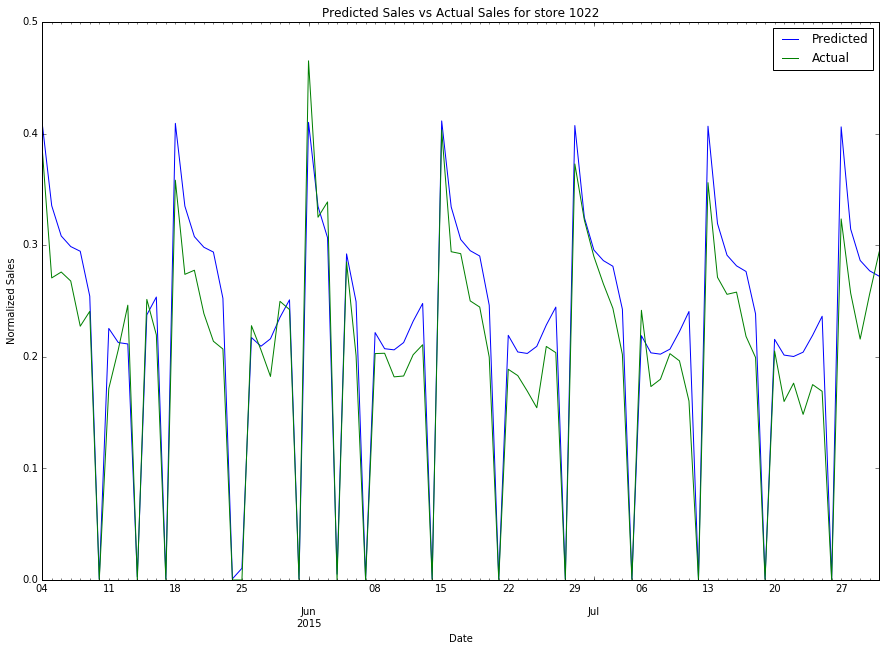

In [36]:
result = pd.DataFrame({'Date' : hdf['train_data']['Date'].loc[hdf['train_data']['Store'] == 1022][853:],
                       'Predicted' : predictions_1022[100:, 0],
                       'Actual' : train_outputs_1022[853:][:, 0]})
result.plot("Date", ["Predicted", "Actual"], figsize=(15, 10))
plt.title('Predicted Sales vs Actual Sales for store 1022')
plt.ylabel('Normalized Sales')
plt.show()

In [26]:
train_inputs = hdf['train_data'][input_features]\
                   .loc[hdf['train_data']['Store'] == 307]\
                   .as_matrix()

store_inputs = hdf['store_data'][store_features]\
                   .loc[hdf['store_data']['Store'] == 307]\
                   .as_matrix()

train_inputs = np.append(np.repeat(store_inputs, len(train_inputs), axis=0),
                         train_inputs, axis=1)

train_inputs_307 = train_inputs.reshape(train_inputs.shape + (1,))

train_outputs_307 = hdf['train_data'][output_features]\
                       .loc[hdf['train_data']['Store'] == 307]\
                       .as_matrix()
print('\n\nStore: ' + str(307) + '\n')
history_307 = model.fit(train_inputs_307[:753], train_outputs_307[:753], batch_size=batch_size, nb_epoch=10)
predictions_307 = model.predict(train_inputs_307[753:])



Store: 307

Epoch 1/10
753/753 [==============================] - 23s - loss: 8.4444e-04 - acc: 0.6282    
Epoch 2/10
753/753 [==============================] - 23s - loss: 3.8860e-04 - acc: 0.6401    
Epoch 3/10
753/753 [==============================] - 23s - loss: 3.3495e-04 - acc: 0.6547    
Epoch 4/10
753/753 [==============================] - 22s - loss: 3.2574e-04 - acc: 0.6653    
Epoch 5/10
753/753 [==============================] - 23s - loss: 3.0606e-04 - acc: 0.6746    
Epoch 6/10
753/753 [==============================] - 23s - loss: 2.8195e-04 - acc: 0.6959    
Epoch 7/10
753/753 [==============================] - 23s - loss: 2.8431e-04 - acc: 0.6999    
Epoch 8/10
753/753 [==============================] - 23s - loss: 2.7487e-04 - acc: 0.6919    
Epoch 9/10
753/753 [==============================] - 23s - loss: 2.4956e-04 - acc: 0.7012    
Epoch 10/10
753/753 [==============================] - 23s - loss: 2.5846e-04 - acc: 0.7211    


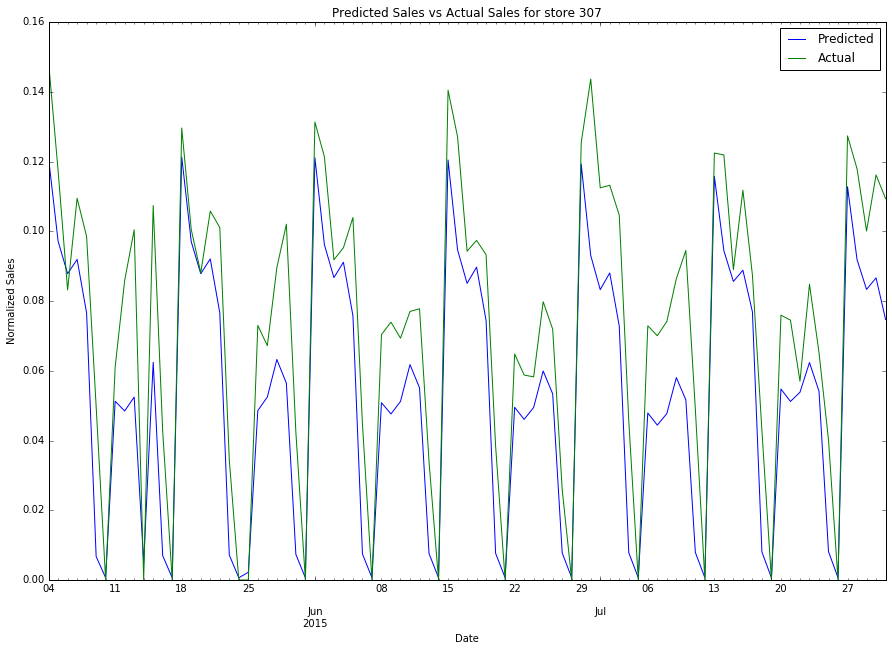

In [27]:
result = pd.DataFrame({'Date' : hdf['train_data']['Date'].loc[hdf['train_data']['Store'] == 307][853:],
                       'Predicted' : predictions_307[100:, 0],
                       'Actual' : train_outputs_307[853:][:, 0]})
result.plot("Date", ["Predicted", "Actual"], figsize=(15, 10))
plt.title('Predicted Sales vs Actual Sales for store 307')
plt.ylabel('Normalized Sales')
plt.show()

In [28]:
train_inputs = hdf['train_data'][input_features]\
                   .loc[hdf['train_data']['Store'] == 45]\
                   .as_matrix()

store_inputs = hdf['store_data'][store_features]\
                   .loc[hdf['store_data']['Store'] == 45]\
                   .as_matrix()

train_inputs = np.append(np.repeat(store_inputs, len(train_inputs), axis=0),
                         train_inputs, axis=1)

train_inputs_45 = train_inputs.reshape(train_inputs.shape + (1,))

train_outputs_45 = hdf['train_data'][output_features]\
                       .loc[hdf['train_data']['Store'] == 45]\
                       .as_matrix()
print('\n\nStore: ' + str(45) + '\n')
history_45 = model.fit(train_inputs_45[:753], train_outputs_45[:753], batch_size=batch_size, nb_epoch=5)
predictions_45 = model.predict(train_inputs_45[753:])



Store: 45

Epoch 1/5
753/753 [==============================] - 23s - loss: 0.0018 - acc: 0.9495    
Epoch 2/5
753/753 [==============================] - 23s - loss: 5.2017e-04 - acc: 0.9934    
Epoch 3/5
753/753 [==============================] - 24s - loss: 5.1053e-04 - acc: 0.9934    
Epoch 4/5
753/753 [==============================] - 24s - loss: 0.0012 - acc: 0.9973    
Epoch 5/5
753/753 [==============================] - 24s - loss: 5.3748e-04 - acc: 0.9987    


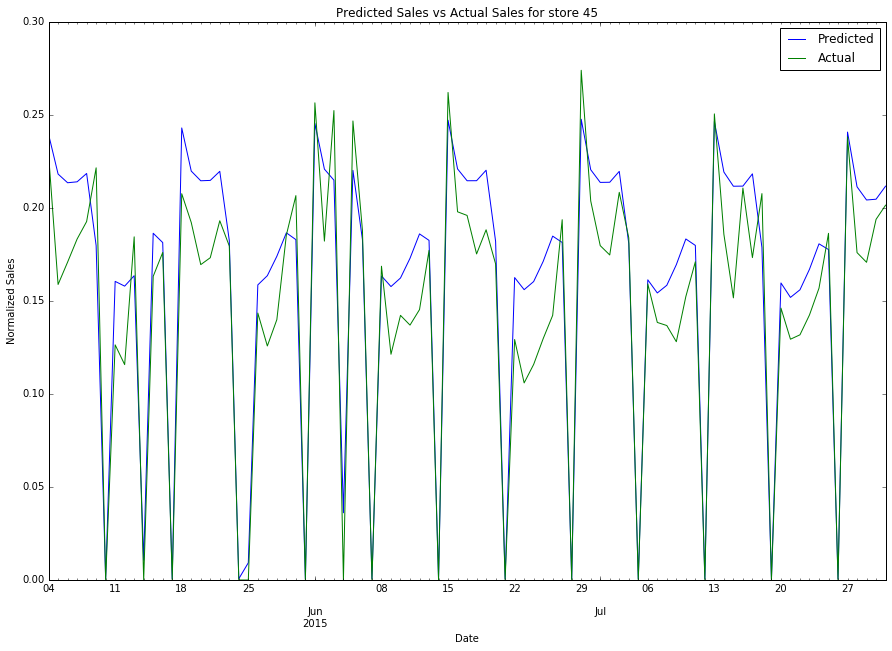

In [29]:
result = pd.DataFrame({'Date' : hdf['train_data']['Date'].loc[hdf['train_data']['Store'] == 45][853:],
                       'Predicted' : predictions_45[100:, 0],
                       'Actual' : train_outputs_45[853:][:, 0]})
result.plot("Date", ["Predicted", "Actual"], figsize=(15, 10))
plt.title('Predicted Sales vs Actual Sales for store 45')
plt.ylabel('Normalized Sales')
plt.show()

In [ ]:
train_inputs = hdf['train_data'][input_features]\
                   .loc[hdf['train_data']['Store'] == 494]\
                   .as_matrix()

store_inputs = hdf['store_data'][store_features]\
                   .loc[hdf['store_data']['Store'] == 494]\
                   .as_matrix()

train_inputs = np.append(np.repeat(store_inputs, len(train_inputs), axis=0),
                         train_inputs, axis=1)

train_inputs_494 = train_inputs.reshape(train_inputs.shape + (1,))

train_outputs_494 = hdf['train_data'][output_features]\
                       .loc[hdf['train_data']['Store'] == 494]\
                       .as_matrix()

model.evaluate(train_inputs_494, train_outputs_494, verbose=1)
predictions_494 = model.predict(train_inputs_494)

In [ ]:
result = pd.DataFrame({'Date' : hdf['train_data']['Date'].loc[hdf['train_data']['Store'] == 1022],
                       'Predicted' : predictions_494[:, 0],
                       'Actual' : train_outputs_494[:][:, 0]})
result.plot("Date", ["Predicted", "Actual"], figsize=(15, 10))
plt.title('Predicted Sales vs Actual Sales for store 494')
plt.ylabel('Normalized Sales')
plt.show()